## Goal:
### Explore the Car_crash dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand the relationship between Car crashes and survival.

### 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [3]:
df = sns.load_dataset('car_crashes')
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### 4. Explore Data

In [4]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (51, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB
None
total             0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64
           total   speeding    alcohol  not_distracted  no_previous  \
count  51.000000  51.000000  51.000000       51.000000    51.000000   
mean   15.790196   4.998196   4.886784       13.573176    14.

### Insights:
1. There are 10 state-level records with features such as total incidents, speeding, alcohol involvement, distractions, prior incidents, insurance premiums, and losses.

2. The dataset is complete—no missing values were found in any columns after cleaning.

3. Substantial variation exists among the states in totals, risk factors, and insurance metrics, setting up for meaningful comparisons and further analysis.

### 5. Data Cleaning

In [5]:
# Fill missing values in 'total' column with mean
df['total'] = df['total'].fillna(df['total'].mean())

# Fill missing values in 'abbrev' (categorical) column with mode
df['abbrev'] = df['abbrev'].fillna(df['abbrev'].mode()[0])

# Drop rows with missing insurance premium info if any
df = df.dropna(subset=['ins_premium'])


### Insights:

1. Filling missing numeric values (e.g., 'total') with the mean maintains overall dataset balance without being skewed by extremes.

2. Filling missing categorical values (e.g., 'abbrev') with the mode ensures that common categories are preserved, avoiding introducing rare or erroneous labels.

3. Dropping rows with missing critical values (like 'ins_premium') ensures that key metrics used in analyses retain validity and completeness.

### 6. Analysis with NumPy & Pandas

In [6]:
# Average total incidents
avg_total = np.mean(df['total'])
print("Average Total Incidents:", avg_total)

# Average insurance premium
avg_premium = np.mean(df['ins_premium'])
print("Average Insurance Premium:", avg_premium)

# Average insurance losses
avg_losses = np.mean(df['ins_losses'])
print("Average Insurance Losses:", avg_losses)

# Average speeding rate by premium quartile
speeding_by_quartile = df.groupby(pd.qcut(df['ins_premium'], 4))['speeding'].mean()
print("Average Speeding Rate by Insurance Premium Quartile:\n", speeding_by_quartile)

# Average alcohol involvement by premium quartile
alcohol_by_quartile = df.groupby(pd.qcut(df['ins_premium'], 4))['alcohol'].mean()
print("Average Alcohol Involvement Rate by Insurance Premium Quartile:\n", alcohol_by_quartile)


Average Total Incidents: 15.79019607843137
Average Insurance Premium: 886.9576470588235
Average Insurance Losses: 134.49313725490197
Average Speeding Rate by Insurance Premium Quartile:
 ins_premium
(641.9590000000001, 768.43]    4.514692
(768.43, 858.97]               5.474846
(858.97, 1007.945]             5.758167
(1007.945, 1301.52]            4.303538
Name: speeding, dtype: float64
Average Alcohol Involvement Rate by Insurance Premium Quartile:
 ins_premium
(641.9590000000001, 768.43]    5.117154
(768.43, 858.97]               5.038615
(858.97, 1007.945]             5.328000
(1007.945, 1301.52]            4.097308
Name: alcohol, dtype: float64


C:\Users\Koush\AppData\Local\Temp\ipykernel_14308\356268802.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  speeding_by_quartile = df.groupby(pd.qcut(df['ins_premium'], 4))['speeding'].mean()
C:\Users\Koush\AppData\Local\Temp\ipykernel_14308\356268802.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alcohol_by_quartile = df.groupby(pd.qcut(df['ins_premium'], 4))['alcohol'].mean()


### 7. Visualization with Matplotlib

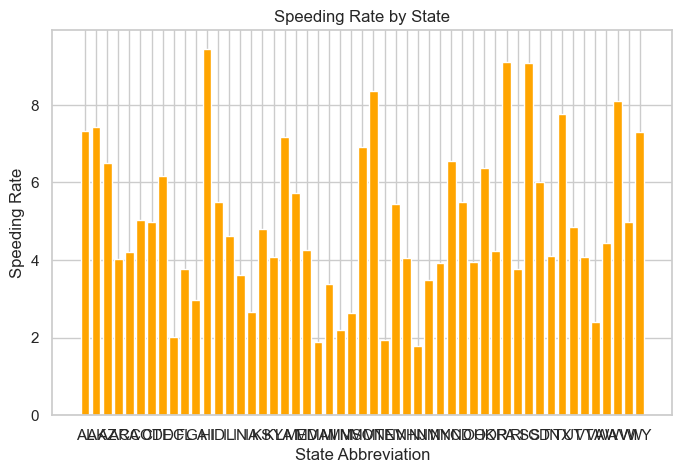

In [7]:
# Bar plot: Average speeding rate by state abbreviation
plt.figure(figsize=(8,5))
plt.bar(df['abbrev'], df['speeding'], color='orange')
plt.xlabel('State Abbreviation')
plt.ylabel('Speeding Rate')
plt.title('Speeding Rate by State')
plt.show()

### Insights:

1. Speeding rates vary considerably across states, with some states showing higher averages, highlighting areas with potentially greater speeding-related risk.

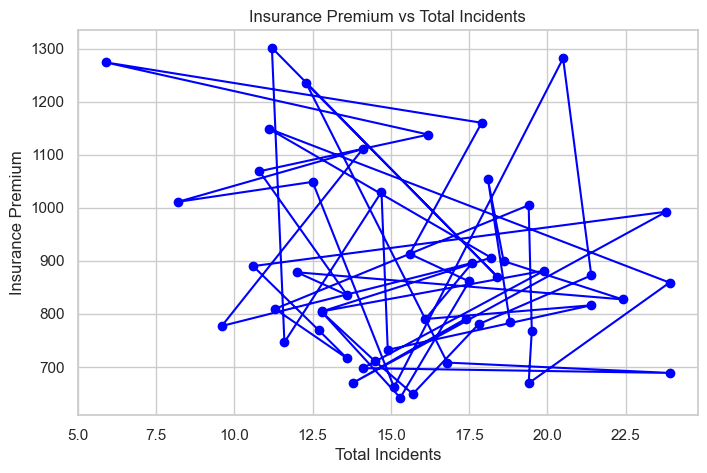

In [8]:
# Line plot: Total incidents vs. Insurance premium
plt.figure(figsize=(8,5))
plt.plot(df['total'], df['ins_premium'], marker='o', linestyle='-', color='blue')
plt.xlabel('Total Incidents')
plt.ylabel('Insurance Premium')
plt.title('Insurance Premium vs Total Incidents')
plt.show()

### Insights:

1. The line plot shows a positive relationship between total incidents and insurance premiums, indicating that states with more incidents tend to have higher insurance costs.

2. Variation in speeding and insurance premiums across states aligns with expectations on risk factors influencing insurance pricing and traffic safety concerns.
These visual insights provide a foundation for further detailed analysis and targeted interventions.

### 8. Visualization with Seaborn

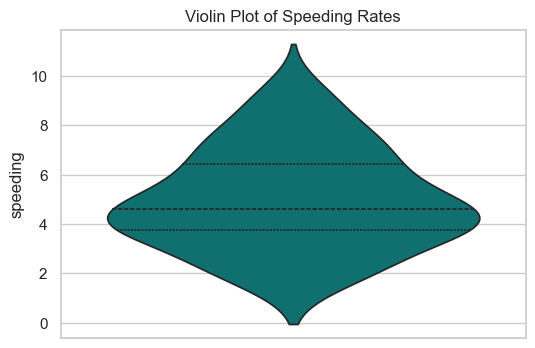

In [9]:

# Violin plot of speeding rates across states
plt.figure(figsize=(6,4))
sns.violinplot(y='speeding', data=df, inner='quartile', color='teal')
plt.title('Violin Plot of Speeding Rates')
plt.show()

### Insights:

1. Shows the distribution shape of speeding rates across states.

2. Some states exhibit wider variation, indicating inconsistent speeding behaviors within the state.

3. The quartiles within the violin plot highlight typical speeding rates, revealing where most data points concentrate.

C:\Users\Koush\AppData\Local\Temp\ipykernel_14308\2221649044.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='abbrev', data=df, palette='Pastel1')


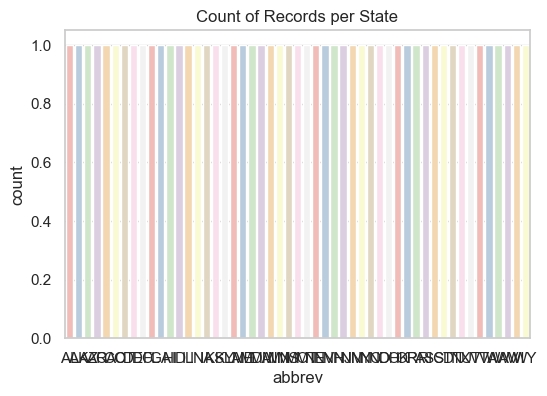

In [10]:
# Countplot of states (for visualization, though each state is unique here)
plt.figure(figsize=(6,4))
sns.countplot(x='abbrev', data=df, palette='Pastel1')
plt.title('Count of Records per State')
plt.show()

### Insights:

1. Confirms there is exactly one record per state, validating dataset uniqueness.

2. Makes clear the dataset covers 10 different states without duplication.

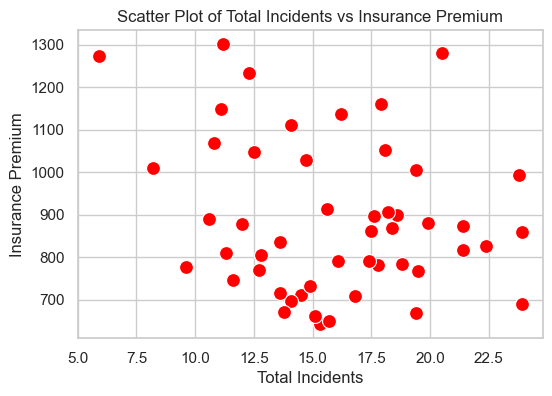

In [11]:
# Scatter plot: Total incidents vs Insurance premium
plt.figure(figsize=(6,4))
sns.scatterplot(x='total', y='ins_premium', data=df, s=100, color='red')
plt.title('Scatter Plot of Total Incidents vs Insurance Premium')
plt.xlabel('Total Incidents')
plt.ylabel('Insurance Premium')
plt.show()

### Insights:

1. Displays a positive association between total traffic incidents and insurance premiums.

2. Suggests that states with higher incident totals tend to pay higher insurance premiums, consistent with risk-based pricing models.

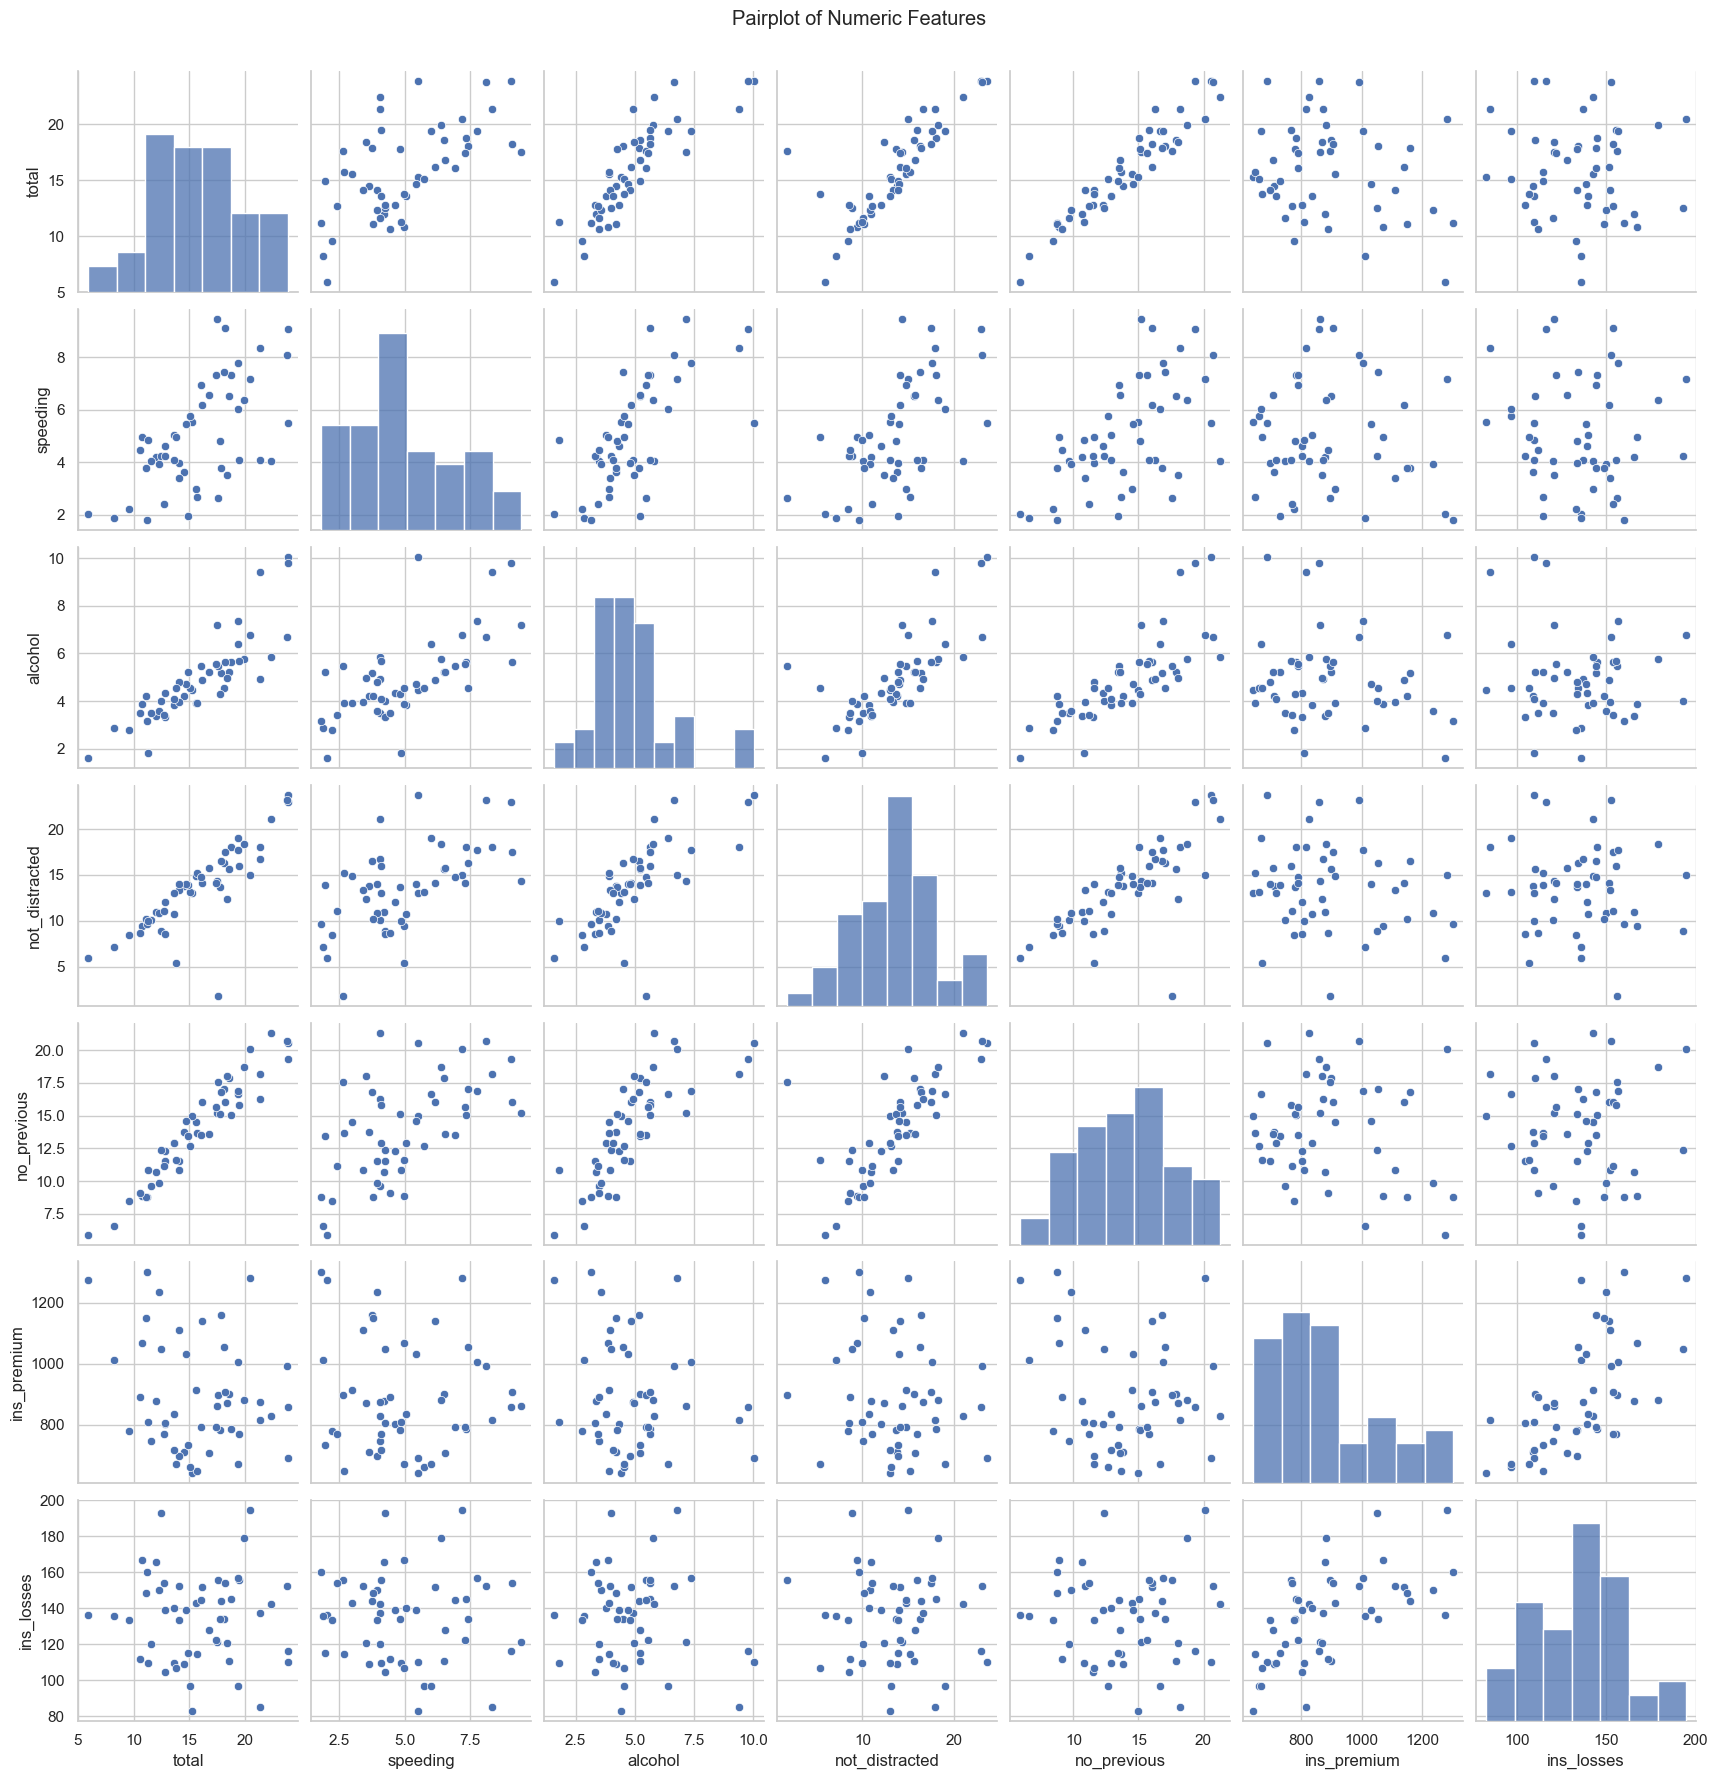

In [12]:
# Pairplot of numeric data
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

### Insights:

1. Illustrates relationships between all numeric features simultaneously.

2. Shows moderate to weak linear relationships; some clusters or trends may emerge especially between total incidents, speeding, and premiums.

3. Helps identify predictive feature candidates or data segmentation opportunities.

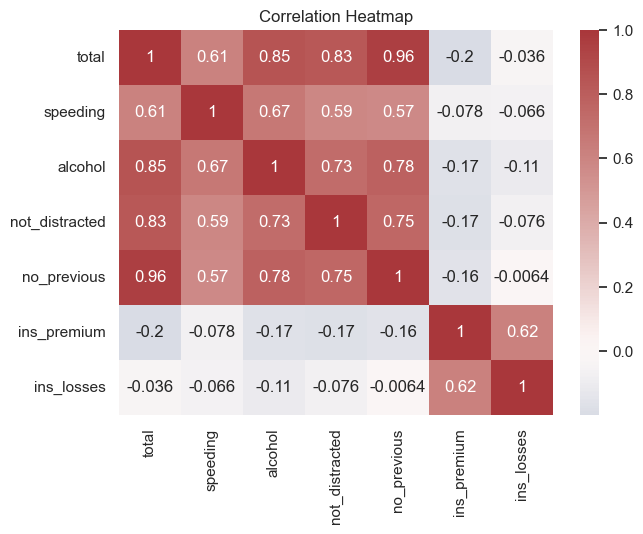

In [13]:
# Heatmap of correlation matrix
plt.figure(figsize=(7,5))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='vlag', center=0)
plt.title('Correlation Heatmap')
plt.show()

### Insights:

1. Quantifies the strength and direction of relationships between numeric variables.

2. Confirms positive correlations between total incidents, speeding, and insurance premiums.

3. Identifies low or negligible correlations where factors may be independent, informing model feature selection.